In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib import pyplot
import random
from random import randrange
from random import seed
from random import randrange

# Read File
data_set =pd.read_csv('Lab2.csv', sep=',')

#print(len(data_set))
#print(data_set)

In [3]:
def cross_validation(folds, data_set):
    
    # Create 10 different folders
    folds = folds
    data_set_copy = data_set
    data_set_split = pd.DataFrame()
    fold_size = int(len(data_set) / folds)
    #print(fold_size)
    index_array = list()
    folder_name = ["folder1" ,"folder2", "folder3","folder4","folder5","folder6","folder7","folder8","folder9","folder10",]

    for i in range(folds):
        fold = data_set.iloc[0:0,:].copy()
        if i != 9:
            fold_size = 8
        else:
            fold_size = 7    
        while len(fold) < fold_size:
            #print(len(fold))
            index = randrange(len(data_set_copy))
            #print(index)
            #print(index_array)
            if index not in index_array:
                index_array.append(index)
                df = data_set_copy.iloc[index,:]
                fold = fold.append(df)
        folder_name[i] = fold

    return folder_name, index_array, folds

In [4]:
def Duplicates(index_array):
    # To check if an index is being used twice
    if len(index_array) == len(set(index_array)):
        return False
    else:
        return True

In [5]:
def split_train_test(folder_number ,data_set, folder_name, folds):
    i = folder_number
    test_set = data_set.iloc[0:0,:].copy()
    test_set = folder_name[i] 
    #print(len(test_set))

    training_set = data_set.iloc[0:0,:].copy()
    for a in range(folds):
        if a != i:
            training_set = training_set.append(folder_name[a])

    #print(len(training_set))
    return training_set, test_set

In [6]:
# Function to split into x and y 
def split_x_y(data_set):
    data_set_x = data_set.iloc[:, 1:(len(data_set.columns))]
    data_set_y = data_set.iloc[:, 0]
    return data_set_x, data_set_y

In [7]:
# Function to normalizr using Z-score

def z_score_norm(data_set_train_x,data_set_test_x):

    data_set_train_norm_x = data_set_train_x.copy()
    data_set_test_norm_x = data_set_test_x.copy()

    for column in data_set_train_norm_x.columns:
        data_set_train_norm_x[column] = (data_set_train_x[column] - data_set_train_x[column].mean()) / data_set_train_x[column].std()
        data_set_test_norm_x[column] = (data_set_test_x[column] - data_set_train_x[column].mean()) / data_set_train_x[column].std()

    return data_set_train_norm_x,data_set_test_norm_x
  


In [8]:
# Add intercept to the matrix for the matrix multiplications
def add_intercept(data_set_train_norm_x,data_set_test_norm_x):
    data_set_train_norm_x.insert(0,'intercept',1)
    data_set_test_norm_x.insert(0,'intercept',1)
    return data_set_train_norm_x,data_set_test_norm_x

In [9]:
# SSE function
def sse_function(data_set_train_norm_x, data_set_train_y,w):
    Y_pred = data_set_train_norm_x.dot(w)
    err_sub = np.subtract(Y_pred, data_set_train_y)
    sse = np.sum(err_sub.T.dot(err_sub))
    return sse

In [10]:
# Run function
def run_function(training_set_all, test_set_all, number_of_pred):
    # Run script for 8 predictors

    # Data Wrangling
    # Split training and test data set into x and y
    sse_training_all = list()
    sse_test_all = list()
    number_of_pred = number_of_pred

    for i in range(10):
        data_set_train_x, data_set_train_y = split_x_y(training_set_all[i])
        data_set_test_x, data_set_test_y = split_x_y(test_set_all[i])

        if number_of_pred == 2:
            data_set_train_x = data_set_train_x.iloc[:,0:2]
        
        if number_of_pred == 2:
            data_set_test_x = data_set_test_x.iloc[:,0:2]
        
        # Normalize data set using Z-score
        data_set_train_norm_x,data_set_test_norm_x = z_score_norm(data_set_train_x,data_set_test_x)
        
        # Add intercept to the matrix
        data_set_train_norm_x,data_set_test_norm_x = add_intercept(data_set_train_norm_x,data_set_test_norm_x)

        # Validate
        #print(len(data_set_train_norm_x))
        #print(len(data_set_test_norm_x))

        # Find the coefficients
        wMLE = inv(data_set_train_norm_x.T.dot(data_set_train_norm_x)).dot(data_set_train_norm_x.T).dot(data_set_train_y)
        #print(wMLE)

        # Predict y's using w found by linear algebra
        data_set_train_y_hat = data_set_train_norm_x.dot(wMLE)
        #print(data_set_train_y_hat)

        # Evaluation

        # Calculate RMSE
        # RMSE of training using linear algebra

        sse = sse_function(data_set_train_norm_x, data_set_train_y,wMLE)
        #print('RMSE of training data set using linear algebra is :',sse)
        sse_training_all.append(sse)
        #print(sse_training_all)

        # Calculate RMSE of test
        sse_test = sse_function(data_set_test_norm_x, data_set_test_y,wMLE)
        #print('RMSE of test data set using linear algebra is :',sse_test)
        sse_test_all.append(sse_test)
        #print(sse_test_all)
    
    sse_cv_training = np.sum(sse_training_all) 
    sse_cv_test = np.sum(sse_test_all)
    #if number_of_pred == 2:
        #print('SSE of training data sets with 2 predictors using cross validation :',sse_cv_training)
        #print('SSE of test data sets with 2 predictors using cross validation :',sse_cv_test)
    #else: 
        #print('SSE of training data sets with 8 predictors using cross validation :',sse_cv_training)
        #print('SSE of test data sets with 8 predictors using cross validation :',sse_cv_test)
    
    
    return(sse_training_all, sse_test_all,sse_cv_training,sse_cv_test )

In [11]:
# Run models for 20 replications
sse_cv_training_reps_8pred = list()
sse_cv_test_reps_8pred = list()

sse_cv_training_reps_2pred = list()
sse_cv_test_reps_2pred = list()

# For replications
for a in range(20):
    folder_name, index_array, folds = cross_validation(folds = 10, data_set=data_set)

    training_set_all = ["train1" ,"train2","train3","train4","train5","train6","train7","train8","train9","train10"]
    test_set_all = ["test1" ,"test2","test3","test4","test5","test6","test7","test8","test9","test10"]

    for i in range(10):
        training_set, test_set = split_train_test(folder_number = i,data_set = data_set, folder_name =folder_name, folds = folds)  
        training_set_all[i] = training_set
        test_set_all[i] = test_set

    sse_training_all_8pred, sse_test_all_8pred,sse_cv_training_8pred,sse_cv_test_8pred = run_function(training_set_all, test_set_all,number_of_pred = 8)
    sse_cv_training_reps_8pred.append(sse_cv_training_8pred)
    sse_cv_test_reps_8pred.append(sse_cv_test_8pred)   

    sse_training_all_2pred, sse_test_all_2pred,sse_cv_training_2pred,sse_cv_test_2pred = run_function(training_set_all, test_set_all,number_of_pred = 2)
    sse_cv_training_reps_2pred.append(sse_cv_training_2pred)
    sse_cv_test_reps_2pred.append(sse_cv_test_2pred)


    

In [12]:
# Results
#print('SSE CV Training 8 Predictors 20 Replication')
#print(sse_cv_training_reps_8pred)
#print('Average:', np.mean(sse_cv_training_reps_8pred))

print('SSE CV Test 8 Predictors 20 Replication')
print(sse_cv_test_reps_8pred)
print('Average:', np.mean(sse_cv_test_reps_8pred))

#print('SSE CV Training 2 Predictors 20 Replication')
#print(sse_cv_training_reps_2pred)
#print('Average:', np.mean(sse_cv_training_reps_2pred))

print('SSE CV Test 2 Predictors 20 Replication')
print(sse_cv_test_reps_2pred)
print('Average:', np.mean(sse_cv_test_reps_2pred))

SSE CV Test 8 Predictors 20 Replication
[29282.64161879556, 31652.605955404662, 31764.01290111318, 34320.70884972669, 30925.113479514934, 30249.109770390645, 32032.235770034356, 32463.99274424446, 31043.46805162772, 30806.109630085568, 30422.59859152534, 32619.63685583991, 31983.854704168196, 30325.33619401256, 31594.739083634406, 31022.925509850385, 29574.216911156353, 31750.324769442694, 31694.785196653695, 31116.120746920573]
Average: 31332.226866707097
SSE CV Test 2 Predictors 20 Replication
[25360.50151031854, 26375.35630079312, 25952.338934907755, 26565.731727519673, 25359.4606870599, 25116.069356599466, 25283.864905244598, 27105.019659398076, 25192.677920725666, 25755.096515072153, 25988.322835734874, 25666.117487126612, 25520.867336307296, 25403.20748129199, 25889.159398457432, 25363.945200660797, 25620.81817147002, 26007.46585361116, 25374.394631426854, 26131.44399993354]
Average: 25751.592995682975


In [28]:
# Create table for comparison
SSE_CV_all = pd.DataFrame()
average_row = pd.DataFrame()

test_8pred = pd.DataFrame (sse_cv_test_reps_8pred,columns=['Test 8 Predictors'])
test_2pred = pd.DataFrame (sse_cv_test_reps_2pred,columns=['Test 2 Predictors'])

SSE_CV_all = test_8pred
SSE_CV_all['Test 2 Predictors'] = test_2pred 

average_row = { 'Test 8 Predictors':np.mean(sse_cv_test_reps_8pred),  'Test 2 Predictors':np.mean(sse_cv_test_reps_2pred)}

SSE_CV_all = SSE_CV_all.append(average_row, ignore_index=True)
SSE_CV_all= SSE_CV_all.rename(index={20: "Average"})

print(SSE_CV_all)

         Test 8 Predictors  Test 2 Predictors
0             29282.641619       25360.501510
1             31652.605955       26375.356301
2             31764.012901       25952.338935
3             34320.708850       26565.731728
4             30925.113480       25359.460687
5             30249.109770       25116.069357
6             32032.235770       25283.864905
7             32463.992744       27105.019659
8             31043.468052       25192.677921
9             30806.109630       25755.096515
10            30422.598592       25988.322836
11            32619.636856       25666.117487
12            31983.854704       25520.867336
13            30325.336194       25403.207481
14            31594.739084       25889.159398
15            31022.925510       25363.945201
16            29574.216911       25620.818171
17            31750.324769       26007.465854
18            31694.785197       25374.394631
19            31116.120747       26131.444000
Average       31332.226867       2

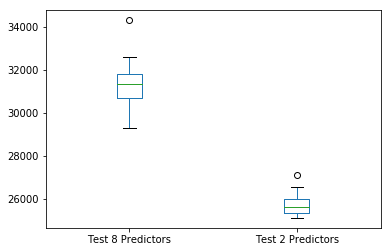

In [30]:
SSE_CV_all_boxplot = test_8pred
SSE_CV_all_boxplot['Test 2 Predictors'] = test_2pred 
#print(SSE_CV_all_boxplot)

SSE_CV_all_boxplot.plot(kind='box')
plt.show()

In [27]:
# For more statistics including also the training error
# Create table for comparison, also include training errors
SSE_CV_all = pd.DataFrame()
average_row = pd.DataFrame()

train_8pred = pd.DataFrame (sse_cv_training_reps_8pred,columns=['Training 8 Predictors'])
test_8pred = pd.DataFrame (sse_cv_test_reps_8pred,columns=['Test 8 Predictors'])
train_2pred = pd.DataFrame (sse_cv_training_reps_2pred,columns=['Training 2 Predictors'])
test_2pred = pd.DataFrame (sse_cv_test_reps_2pred,columns=['Test 2 Predictors'])

SSE_CV_all = train_8pred
SSE_CV_all['Test 8 Predictors'] = test_8pred 
SSE_CV_all['Training 2 Predictors'] = train_2pred 
SSE_CV_all['Test 2 Predictors'] = test_2pred 

average_row = {'Training 8 Predictors':np.mean(sse_cv_training_reps_8pred), 'Test 8 Predictors':np.mean(sse_cv_test_reps_8pred), 'Training 2 Predictors':np.mean(sse_cv_training_reps_2pred), 'Test 2 Predictors':np.mean(sse_cv_test_reps_2pred)}

SSE_CV_all = SSE_CV_all.append(average_row, ignore_index=True)

SSE_CV_all= SSE_CV_all.rename(index={20: "Average"})

#SSE_CV_all = SSE_CV_all.append()
print(SSE_CV_all)



         Training 8 Predictors  Test 8 Predictors  Training 2 Predictors  \
0                198391.091200       29282.641619          210768.652117   
1                197202.826299       31652.605955          210366.709484   
2                197406.749151       31764.012901          210502.906810   
3                196773.433309       34320.708850          210213.209122   
4                197623.348177       30925.113480          210773.470889   
5                197815.360091       30249.109770          210882.460892   
6                197048.051765       32032.235770          210800.447817   
7                197068.429150       32463.992744          210083.688426   
8                197499.430823       31043.468052          210841.202236   
9                197665.238180       30806.109630          210673.930485   
10               197675.619808       30422.598592          210469.617638   
11               196959.324591       32619.636856          210629.543888   
12          